In [57]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow import keras


In [58]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_excel('PruebaTG_v2.xlsx')

In [60]:

df = df.drop(0)
df = df.reset_index(drop= True)

In [61]:
dups = df.pivot_table(index = ['Diagnosis'], aggfunc ='size') 
  
print(dups) 

Diagnosis
diabetes       668
healthy        441
intolerance    865
dtype: int64


In [62]:
#sano 0, intolerate a la glucosa = 1, prediabetes 2, diabetes = 3

df['Diagnosis'] = df['Diagnosis'].replace({'healthy' : 0}, regex=True)

In [63]:
df['Diagnosis'] = df['Diagnosis'].replace({'prediabetes' : 2}, regex=True)

In [64]:
df['Diagnosis'] = df['Diagnosis'].replace({'intolerance' : 1}, regex=True)


In [65]:
df['Diagnosis'] = df['Diagnosis'].replace({'diabetes' : 2}, regex=True)

In [66]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size = 0.30, random_state = 100)

print("Examples used for training: ", len(train))
print("Examples used for test: ", len(test))

Examples used for training:  1381
Examples used for test:  593


In [67]:
#patients = df.drop(["Paciente","Edad","Diagnostico","Basal"], axis=1)
patients = df.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_train = train.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_test = test.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
#patients = patients.drop(0)
p_train.head(5)


,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
545,70.013398,70.099281,70.310719,70.683925,71.242275,71.998571,72.959478,74.124148,75.486303,77.039402,...,113.144839,112.855551,112.568042,112.282307,111.998337,111.716125,111.435664,111.156945,110.879959,110.604700
1286,99.326902,98.643168,98.049814,97.567919,97.213219,96.996921,96.926422,97.005887,97.236775,97.618391,...,132.713109,132.452772,132.194010,131.936818,131.681190,131.427120,131.174602,130.923631,130.674201,130.426308
438,69.569336,69.162807,68.856940,68.668936,68.607480,68.675065,68.869861,69.186851,69.619011,70.158178,...,91.607970,91.476853,91.346337,91.216420,91.087100,90.958376,90.830246,90.702707,90.575758,90.449397
1202,100.001976,100.014997,100.048060,100.108305,100.201347,100.331566,100.502297,100.716048,100.974581,101.279121,...,137.890610,137.620184,137.351102,137.083366,136.816978,136.551939,136.288252,136.025917,135.764937,135.505311
949,88.904965,87.942021,87.276298,86.898256,86.781386,86.895307,87.210217,87.700239,88.342159,89.116041,...,148.575320,148.236815,147.899187,147.562490,147.226851,146.892187,146.558443,146.225671,145.893947,145.563210


<hr>

In [68]:
s = patients.shape
s[1]
x = [i for i in range(0,s[1],30)]
x


[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [69]:
a = [patients.iloc[:,i] for i in range(0,s[1],30)]
x_test = [p_test.iloc[:,i] for i in range(0,s[1],30)]
x_train = [p_train.iloc[:,i] for i in range(0,s[1],30)]
a = np.array(a).T
x_train = np.array(x_train).T
x_test = np.array(x_test).T

x_test.shape


(593, 10)

In [70]:
labels = df[['Diagnosis']]
labels_train = train[['Diagnosis']]
labels_test = test[['Diagnosis']]
#labels = labels.drop(0)
labels_train.head(20)

,Diagnosis
545,1
1286,2
438,0
1202,1
949,1
533,1
1293,1
64,1
202,2
480,2


<hr>

In [71]:
import matplotlib.pyplot as plt

In [72]:
import numpy as np
#a = np.zeros((len(labels), 300))

In [73]:
y_train = labels_train.to_numpy()
y_test = labels_test.to_numpy()

In [74]:
y_train

array([[1],
       [2],
       [0],
       ...,
       [2],
       [0],
       [1]])

In [75]:
a.shape

(1974, 10)

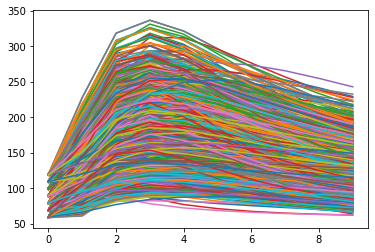

In [76]:
for i in range(0, len(y_train)):
  plt.plot(x_train[i,:])
plt.show()

In [77]:
#a = a.reshape(a.shape[0], 10, 1)
l=labels.to_numpy()
#l = l.reshape(a.shape[0], 3, 1)
len(np.unique(l))

3

In [78]:
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [79]:

a.shape

(1974, 10)

#Normalize

In [80]:
from tensorflow import keras

a = a.astype('float32')
#x_test = x_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
a /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape, 'l')

x_train shape: (1381, 10)
1381 train samples
593 test samples
(1381, 1) l


#K-mean

In [81]:
# One hot encoding

train_series = x_train[0:200,:]
test_series = x_test[0:200,:]
train_series_labels = y_train[0:200,:]
test_series_labels = y_test[0:200,:]


In [82]:
print(train_series.shape, test_series.shape,train_series_labels.shape, test_series_labels.shape)


(200, 10) (200, 10) (200, 1) (200, 1)


In [83]:
print(train_series[:20])
print('-----------------')
print(train_series.shape)

[[ 70.0134   132.38647  191.76561  202.32079  190.72882  173.98427
  157.51317  142.82002  130.09349  119.31563 ]
 [ 99.326904 129.51721  181.99883  201.7759   197.77774  185.43687
  171.73457  158.98767  147.82812  138.25752 ]
 [ 69.569336  92.1271   116.01486  123.05091  120.85184  115.61738
  109.760765 104.122826  98.96046   94.35916 ]
 [100.001976 117.52131  152.96204  175.87845  183.27417  180.6161
  172.83044  163.04706  152.98657  143.57541 ]
 [ 88.90497  117.87369  160.67975  187.81172  197.38663  195.62965
  187.90884  177.60191  166.48975  155.53386 ]
 [ 70.00622  109.21156  155.48544  173.21524  167.28052  146.52997
  125.219086 108.212204  95.720795  87.05311 ]
 [ 99.19018  128.16779  160.30367  167.45198  160.13667  147.78728
  136.47449  127.04846  119.53378  113.68218 ]
 [ 60.007328 106.411354 160.65573  172.2776   160.73473  143.17863
  126.34722  112.04992  100.42959   91.05226 ]
 [ 60.00524  105.382324 182.92229  219.32336  218.1061   199.64793
  176.41911  153.79187

In [84]:
print(test_series[:20])
print('-----------------')
print(test_series.shape)

[[119.26748  138.32623  157.82811  167.19913  168.74016  166.152
  161.82034  156.93996  152.06346  147.45067 ]
 [ 99.9829   116.07832  135.64705  141.13774  137.99553  131.53537
  125.20488  119.73716  115.244286 111.65499 ]
 [ 79.99244   95.75329  126.02946  143.05759  145.92822  141.32849
  133.93158  126.034706 118.61333  112.052864]
 [120.01008  155.3531   201.84409  232.2537   247.65575  252.53508
  250.66649  244.72978  236.53156  227.25452 ]
 [ 70.00874  101.80347  129.60136  136.83795  134.17844  128.3779
  121.95176  115.76     110.06453  104.95374 ]
 [110.00613  150.63419  198.5876   210.59131  200.88255  183.76216
  167.80429  154.43994  143.81999  135.58795 ]
 [120.06633  183.80838  234.23218  250.77873  248.30338  237.27554
  223.3502   209.25397  196.17719  184.54994 ]
 [ 90.016426 181.05002  274.14633  292.07962  277.56662  255.30635
  232.73741  211.75114  192.97072  176.54694 ]
 [ 69.19018   98.13827  129.73604  135.84102  127.35365  114.61491
  103.16884   93.81297  

# Baseline with KNN

In [85]:
!pip install dtw
import warnings
warnings.filterwarnings("ignore")

import dtw
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
# Creating our K-nearest neighbor metric for time-series

class K_nearest_neighbor():
    
    K = 1
    train_series = [] 
    train_series_labels = [] 
    dist_lambda = lambda x, y: np.abs(x - y) #L1 norm as the element comparison distance
    
    def __init__(self, train_series, train_series_labels, K=1,  dist_lambda=lambda x, y: np.abs(x - y)):
        
        self.K = K
        self.train_series = train_series
        self.train_series_labels = train_series_labels
        self.dist_lambda = dist_lambda
    
    
    def predict(self, test_series):
        
        predict_labels = [] 
        
        for test_series_signal in test_series:
            t_dis = []
            
            for train_series_signal in train_series:
                #DTW calculate sequence similarity
                dis, cost_matrix, acc_cost_matrix, path = dtw.accelerated_dtw(test_series_signal.reshape(-1,1),
                                                                              train_series_signal.reshape(-1,1),
                                                                              dist=self.dist_lambda)
                t_dis.append(dis)

            nearest_series_labels = np.array(train_series_labels[np.argsort(t_dis)[:self.K]]).astype(int)
    
            preditc_labels_signal = np.argmax(np.bincount(nearest_series_labels))
            predict_labels.append(preditc_labels_signal)
            
        return predict_labels

In [87]:
len(train_series_labels)

200

In [88]:
train_series_labels = train_series_labels.reshape(len(train_series_labels)) 
test_series_labels  = test_series_labels.reshape(len(test_series_labels))


In [89]:
print(train_series.shape)
print(train_series_labels.shape)
print(test_series.shape)

(200, 10)
(200,)
(200, 10)


1 0.91
2 0.9
3 0.905
4 0.9
5 0.92
6 0.915
7 0.91
8 0.91
9 0.925
-----------------------------------------------------


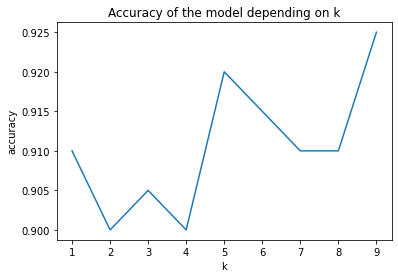

In [90]:
accuracies = [] 
 

for k in range(1, 10):
    my_knn = K_nearest_neighbor(train_series=train_series, 
                                   train_series_labels=train_series_labels, 
                                   K=k)


    predict_labels = my_knn.predict(test_series)
        
    accuracy = np.mean(np.array(predict_labels) == test_series_labels)
    accuracies.append(accuracy)
    print(k, accuracy)

print("-----------------------------------------------------")

plt.plot([k for k in range(1, 10)], accuracies)
plt.title('Accuracy of the model depending on k')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

In [91]:
my_knn = K_nearest_neighbor(train_series=train_series, 
                                   train_series_labels=train_series_labels, 
                                   K=3)


predict_labels = my_knn.predict(test_series)

In [92]:
predict_labels 

[1,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 0]

In [93]:
accuracies = [] 
 
my_knn = K_nearest_neighbor(train_series=train_series, 
                                   train_series_labels=train_series_labels, 
                                   K=k)


predict_labels = my_knn.predict(test_series)
        
accuracy = np.mean(np.array(predict_labels) == test_series_labels)
accuracies.append(accuracy)


#Assessment

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score



In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

#y_pred = np.argmax(p, axis=-1)
#y_true=np.argmax(y_test, axis=-1)

In [96]:
y_pred = np.array(predict_labels)
y_true = test_series_labels


#np.array(predict_labels) == test_series_labels

In [97]:
#aqui
y_pred1 = keras.utils.to_categorical(y_pred, 3)
y_true1 = keras.utils.to_categorical(y_true, 3)

In [98]:
print(y_pred1[:,1],y_true1[:,1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0.] [1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 

In [99]:
# Compute ROC curve and ROC area for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_pred1[:, i], y_true1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_pred1.ravel(), y_true1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

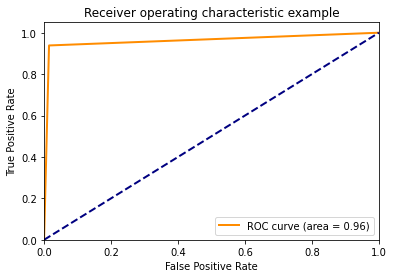

In [100]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

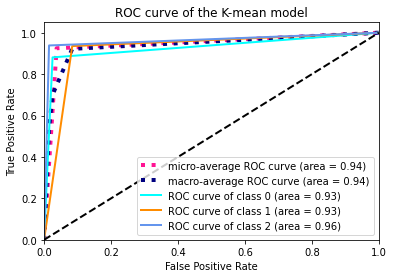

In [133]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of the K-mean model")
plt.legend(loc="lower right")
plt.show()


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

#y_pred = np.argmax(p, axis=-1)
#y_true=np.argmax(y_test, axis=-1)



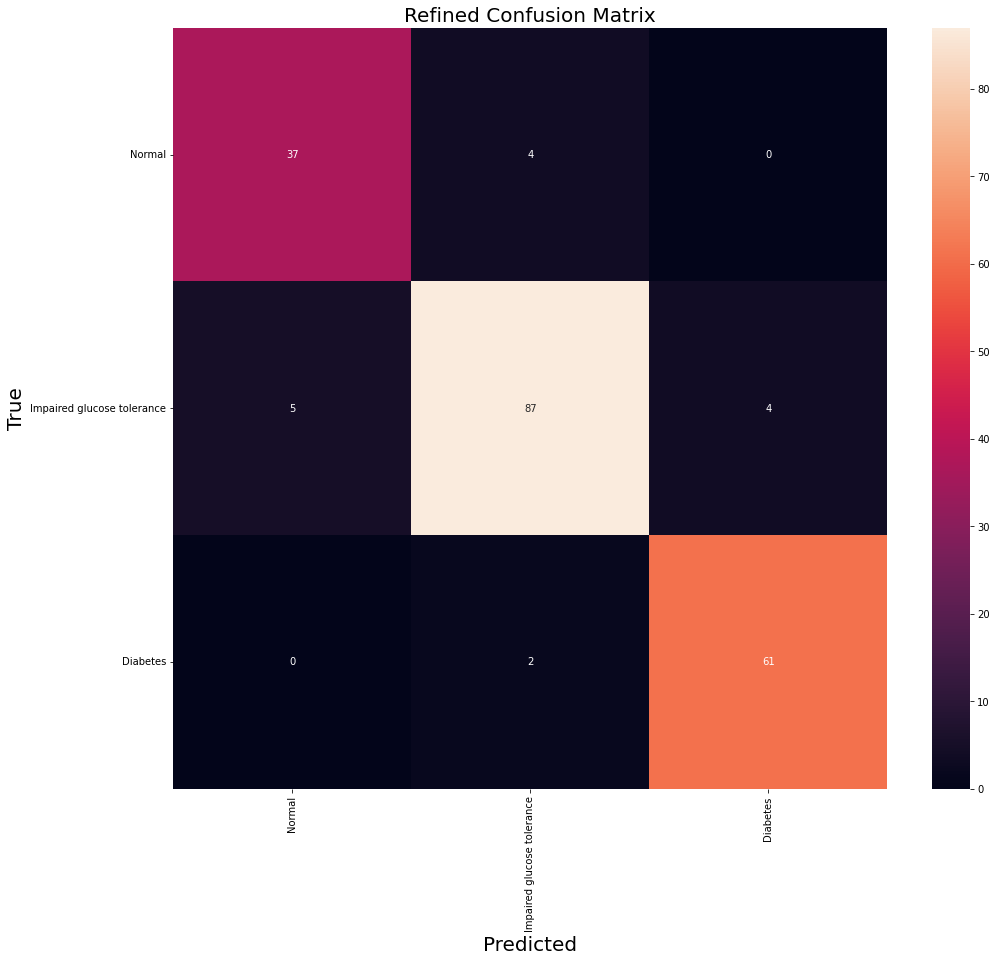

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
#labels = le.classes_
class_names = ['Normal','Impaired glucose tolerance','Diabetes']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [111]:
cm

array([[37,  4,  0],
       [ 5, 87,  4],
       [ 0,  2, 61]])

In [112]:
# Accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_true, y_pred )
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)

In [113]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(y_true, y_pred, average=None)

In [114]:
print(ac,recall,precision,f1)

0.925 [0.90243902 0.90625    0.96825397] [0.88095238 0.93548387 0.93846154] [0.89156627 0.92063492 0.953125  ]


#Test with real data

##healthy 0, glucose intolerance = 1, diabetes = 2

In [121]:
import numpy as np
patient_test = np.array(([ 82., 155.,  141. , 103. ,  96. ,  89. ,  89. , 89. ,  89., 89. ],
                         [ 82.,   118.,  140. , 148., 147.,  146.,  146.,  146.,  146., 146. ],
                         [ 92. , 133.,  72. , 87., 92.,  92. , 92., 92., 92., 92.],
                         [ 157. , 185.,  232. , 216., 197.,  192. , 192., 192., 192., 192.],
                         [ 70, 70, 148, 148, 116, 97, 97, 97, 97, 97 ] ,
                         [ 79, 79, 157, 157, 116, 84, 84, 84, 84, 84 ],
                         [ 82, 82, 94, 94, 102, 102, 102, 102, 102, 102 ] ,
                         [ 95, 95, 180, 180, 155, 155, 140, 140, 140, 140 ],
                         [ 84, 84, 84, 84, 164, 164, 164, 164, 164, 164 ],
                         [ 73, 73, 99, 99, 82, 82, 82, 82, 82, 82 ] , 
                         [ 61, 61, 94, 94, 90, 90, 90, 90, 90, 90 ],
                         [ 100, 100, 100, 100, 149, 149, 149, 149, 149, 149 ],
                         [ 63, 63, 63, 63, 87, 87, 87, 87, 87, 87 ] ,
                         [ 75, 75, 75, 75, 91, 91, 91, 91, 91, 91 ], 
                         [ 117, 117, 145, 145, 98, 98, 98, 98, 98, 98 ],
                         [ 120, 120, 120, 120, 136, 136, 136,136, 136, 136 ]
                         ))
patient_test.shape

(16, 10)

In [122]:
predict = my_knn.predict(patient_test)
print (predict)

[0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]


In [126]:
label = [0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]

In [129]:

# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(label, predict, average=None)

In [130]:
print(ac,recall,precision,f1)

0.925 [0.90243902 0.90625    0.96825397] [0.88095238 0.93548387 0.93846154] [0.88888889 0.83333333 1.        ]
